# Data Scientist Salaries - Data Processing and analysis  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import LabelEncoder

## Data Preparation

### Data Cleaning

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
duplicates = df[df.duplicated()]

In [6]:
duplicates

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [7]:
df.drop_duplicates()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [8]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [9]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [10]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

In [11]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [12]:
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

In [13]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [15]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-level/Intermediate,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-level/Intermediate,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-level/Expert,Full-Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-level/Expert,Full-Time,Data Scientist,120000,USD,120000,CA,100,CA,M


In [16]:
df.drop(['salary','salary_currency',"employee_residence"] , axis='columns', inplace = True)


In [17]:
df.head(20)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,Senior-level/Expert,Full-Time,Principal Data Scientist,85847,100,ES,L
1,2023,Mid-level/Intermediate,Contract,ML Engineer,30000,100,US,S
2,2023,Mid-level/Intermediate,Contract,ML Engineer,25500,100,US,S
3,2023,Senior-level/Expert,Full-Time,Data Scientist,175000,100,CA,M
4,2023,Senior-level/Expert,Full-Time,Data Scientist,120000,100,CA,M
5,2023,Senior-level/Expert,Full-Time,Applied Scientist,222200,0,US,L
6,2023,Senior-level/Expert,Full-Time,Applied Scientist,136000,0,US,L
7,2023,Senior-level/Expert,Full-Time,Data Scientist,219000,0,CA,M
8,2023,Senior-level/Expert,Full-Time,Data Scientist,141000,0,CA,M
9,2023,Senior-level/Expert,Full-Time,Data Scientist,147100,0,US,M


### Visualization

<Axes: >

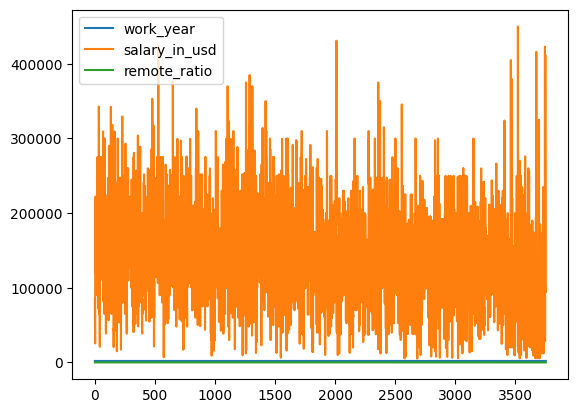

In [18]:
df.plot()

<Axes: ylabel='Frequency'>

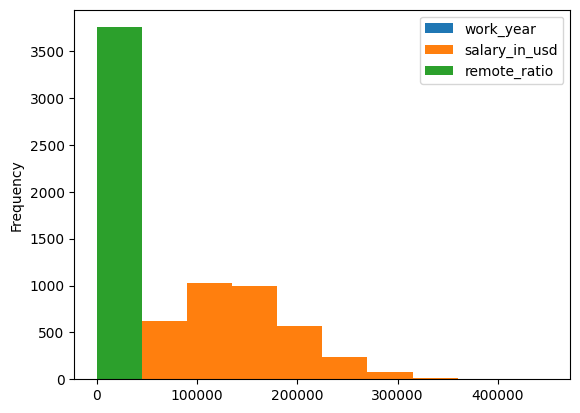

In [19]:
df.plot.hist()

<Axes: ylabel='Density'>

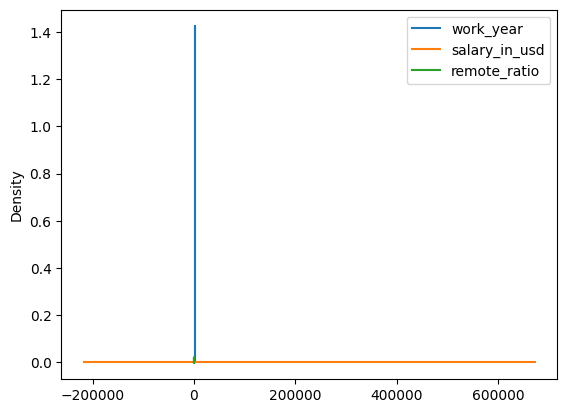

In [20]:
df.plot.kde()

#### Salary Distribution in USD

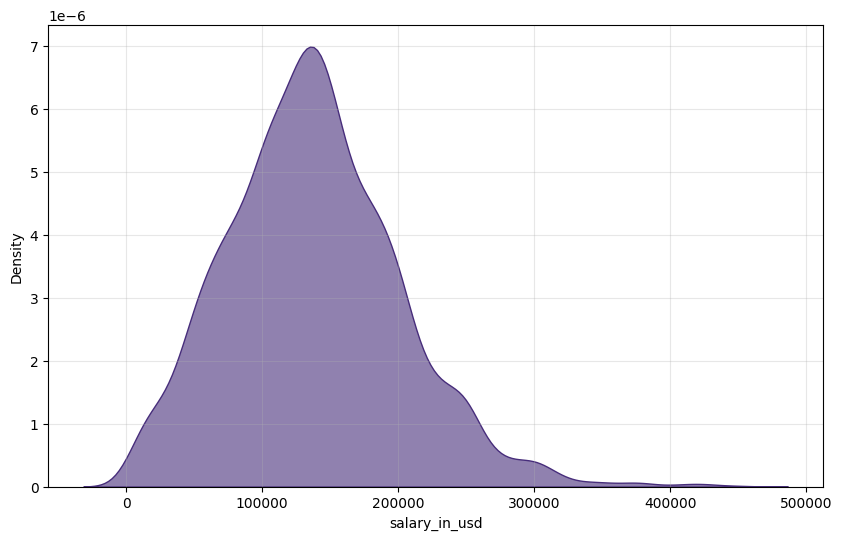

In [21]:
plt.figure(figsize = (10, 6))
sns.kdeplot(df['salary_in_usd'], fill=True, color='#472d7b', alpha=0.6)
plt.grid(alpha=0.3)

#### Distribution of Work Years


Text(0.5, 1.0, 'Distribution of Work Years')

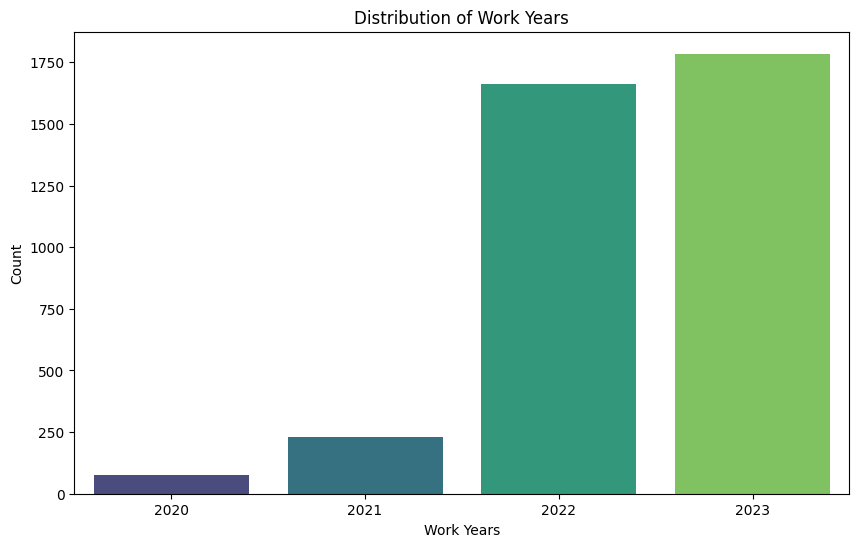

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'work_year', palette = 'viridis')
# Add a title and axis labels
plt.xlabel('Work Years')
plt.ylabel('Count')
plt.title('Distribution of Work Years')

#### Distribution of Experience Levels

Text(0.5, 1.0, 'Distribution of Experience Levels')

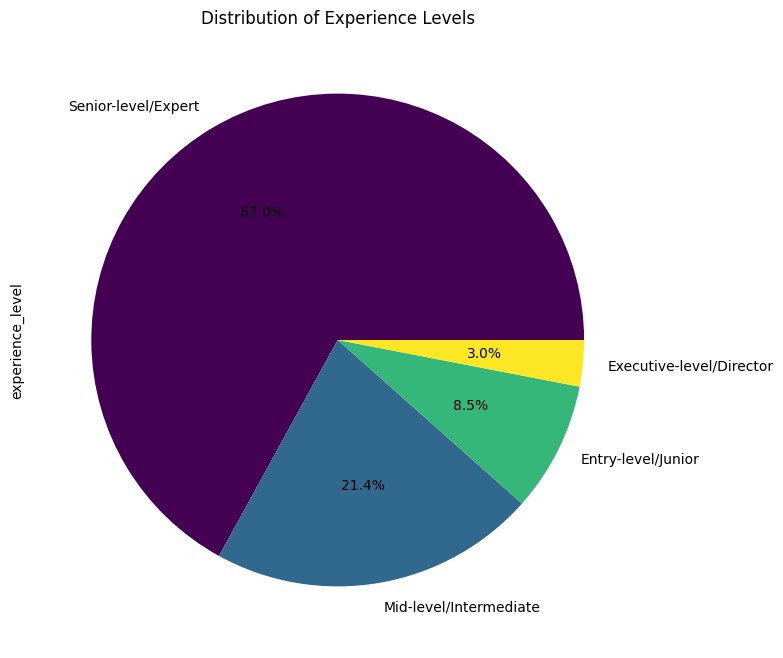

In [23]:
plt.figure(figsize = (10, 8))
# Create the pie chart
df['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='viridis')
# Add a title 
plt.title('Distribution of Experience Levels')

#### Distribution of Employment Types

[Text(0, 0, '113'), Text(0, 0, '1'), Text(0, 0, '0'), Text(0, 0, '0')]

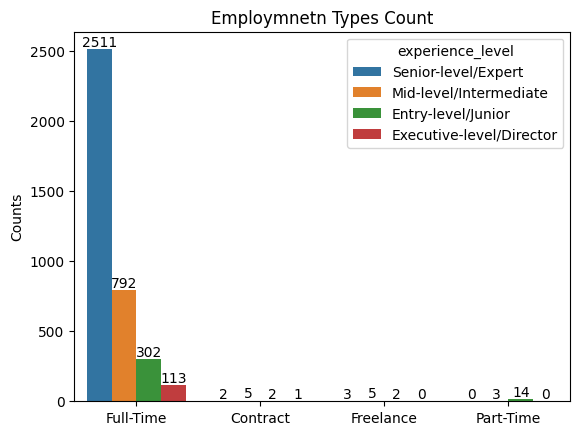

In [24]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.employment_type, hue = 'experience_level')

ax.set(xlabel='', ylabel='Counts', title='Employmnetn Types Count')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])


#### Average salaries based on experience levels


[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

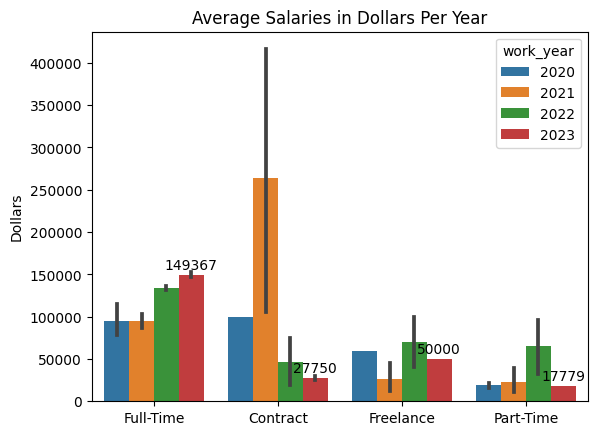

In [25]:
avg_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()
sns.barplot(ax =ax,data = df , x = 'employment_type', y = 'salary_in_usd', hue = 'work_year')
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
ax.bar_label(ax.containers[3], padding = 2)

#### Top 10 Job Titles

Text(0.5, 1.0, 'Top 10 Job Titles')

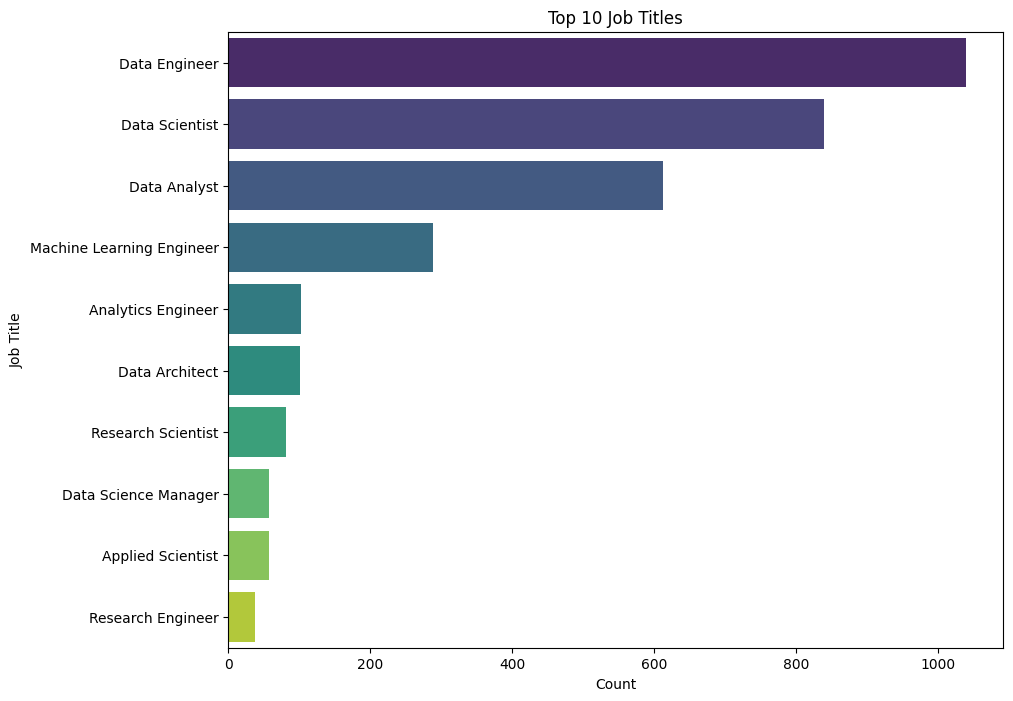

In [26]:
plt.figure(figsize = (10, 8))
top_jobs = df['job_title'].value_counts().nlargest(10)

# Create the bar chart
sns.barplot(x = top_jobs, y = top_jobs.index, palette = 'viridis')

# Add a title and axis labels
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles')

/tmp/ipykernel_12009/1735381263.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i)
/tmp/ipykernel_12009/1735381263.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature, kde = True, alpha = 1, palette = 'viridis')
/tmp/ipykernel_12009/1735381263.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i)
/tmp/ipykernel_12009/1735381263.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = feature, kde = True, alpha = 1, palette = 'viridis')
/tmp/ipykernel_12009/1735381263.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dat

<Figure size 1500x2800 with 0 Axes>

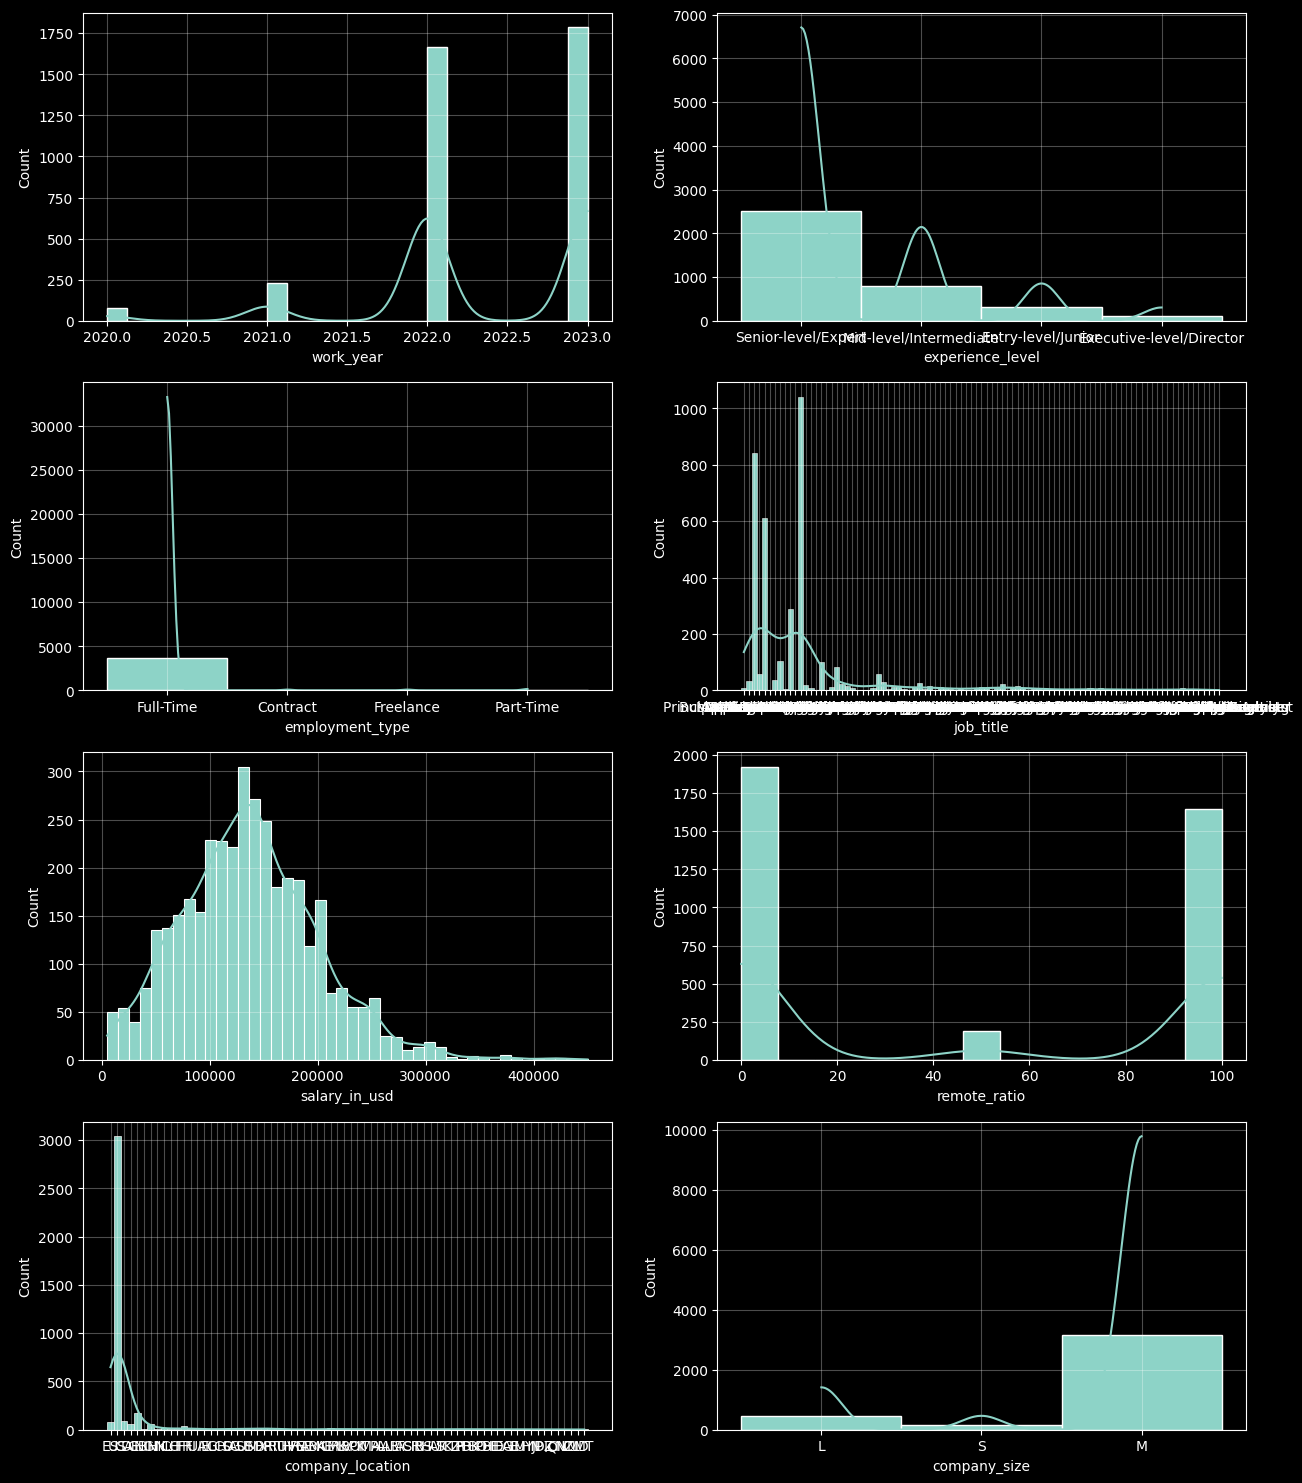

In [27]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (15, 28))

# Adjust subplot vertical spacing
plt.subplots_adjust(hspace = 0.2)

# 6x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(15, 28))

i = 1
# Loop through dataframe columns
for feature in df.columns:
    # Create a subplot
    plt.subplot(6, 2, i)
    # Create histogram
    sns.histplot(data = df, x = feature, kde = True, alpha = 1, palette = 'viridis')
    plt.grid(alpha = 0.3)
    i += 1
    
# Show the plot
plt.show()

### Encoding categorical features to be ready for analysis.

In [28]:
# Extract categorical variables
cat_vars = ['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size']

# Create LabelEncoder object
encoder = LabelEncoder()

# Encode categorical variables as integers
for var in cat_vars:
    df[var] = encoder.fit_transform(df[var])

## Data Transformation / Scaling

In [29]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,3,2,84,85847,100,25,0
1,2023,2,0,66,30000,100,70,2
2,2023,2,0,66,25500,100,70,2
3,2023,3,2,47,175000,100,12,1
4,2023,3,2,47,120000,100,12,1


A standard scaler will be used and visualized.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_std = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

<Axes: ylabel='Frequency'>

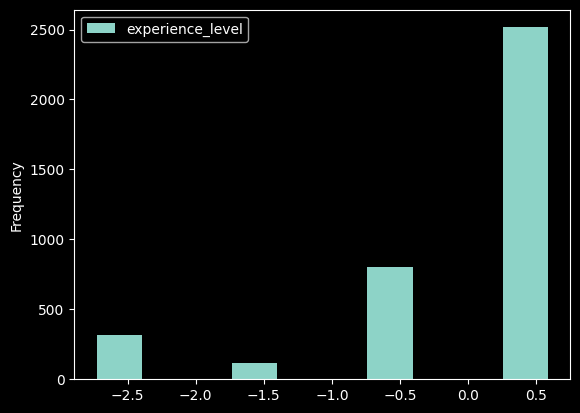

In [61]:
df_scaled_std.plot.hist(y='experience_level')

<Axes: ylabel='Frequency'>

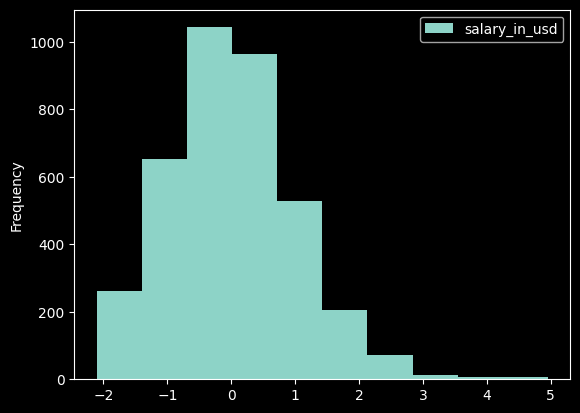

In [62]:
df_scaled_std.plot.hist(y='salary_in_usd')

<Axes: ylabel='Frequency'>

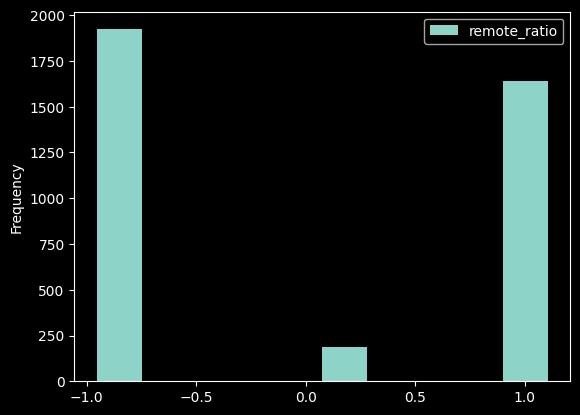

In [63]:
df_scaled_std.plot.hist(y='remote_ratio')

<Axes: ylabel='Frequency'>

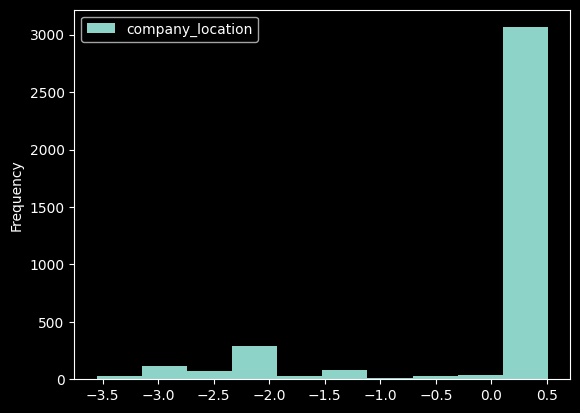

In [64]:
df_scaled_std.plot.hist(y='company_location')

<Axes: ylabel='Frequency'>

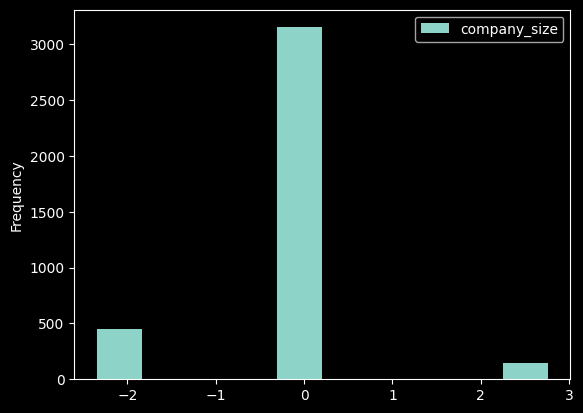

In [65]:
df_scaled_std.plot.hist(y='company_size')

<Axes: ylabel='Frequency'>

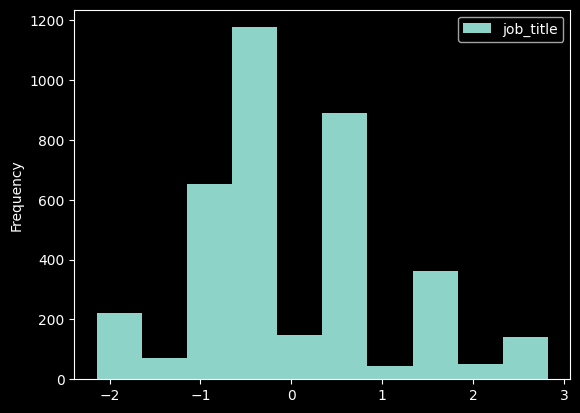

In [66]:
df_scaled_std.plot.hist(y='job_title')

<Axes: ylabel='Density'>

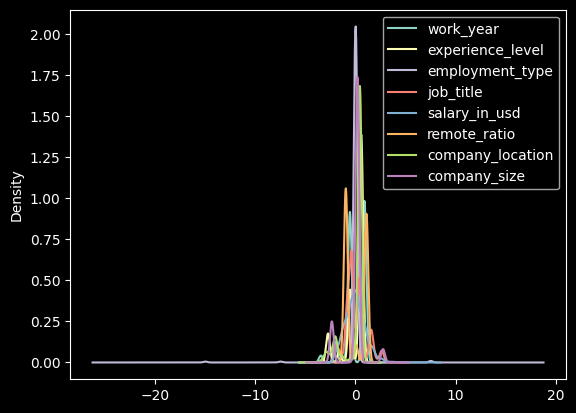

In [32]:
df_scaled_std.plot.kde()

<Axes: ylabel='Density'>

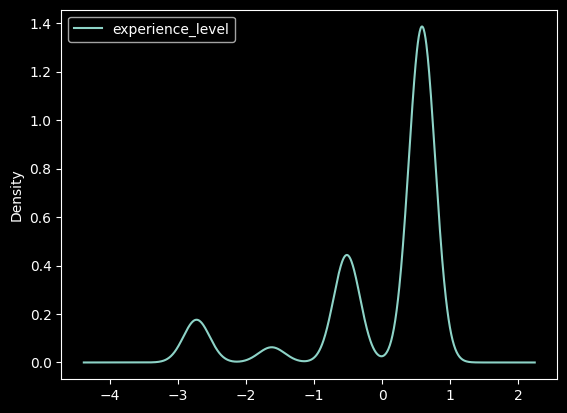

In [68]:
df_scaled_std.plot.kde(y='experience_level')

<Axes: ylabel='Density'>

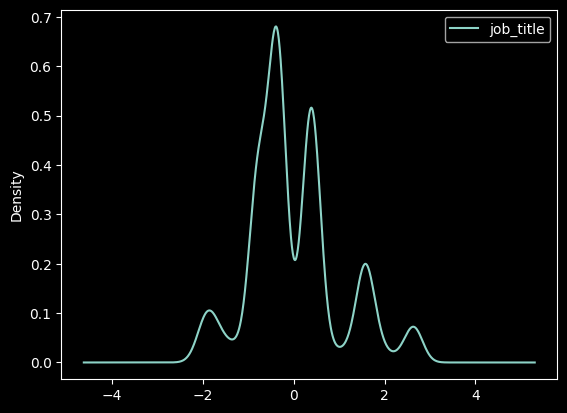

In [72]:
df_scaled_std.plot.kde(y='job_title')

Visualizing with scatter

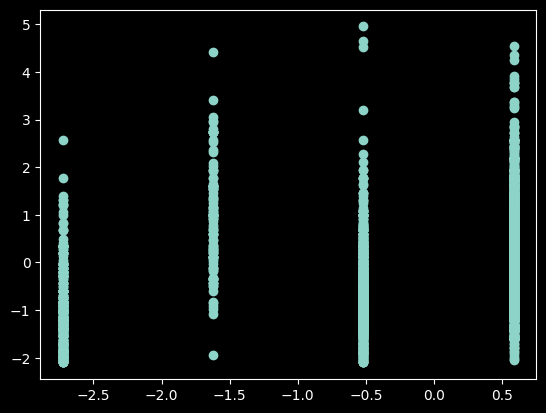

In [70]:
plt.scatter(df_scaled_std.experience_level, df_scaled_std.salary_in_usd)

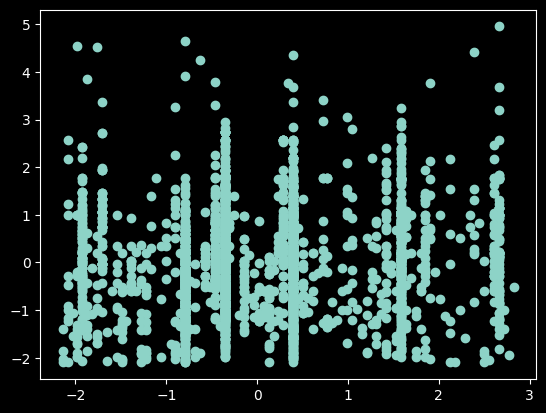

In [34]:
plt.scatter(df_scaled_std.job_title, df_scaled_std.salary_in_usd)

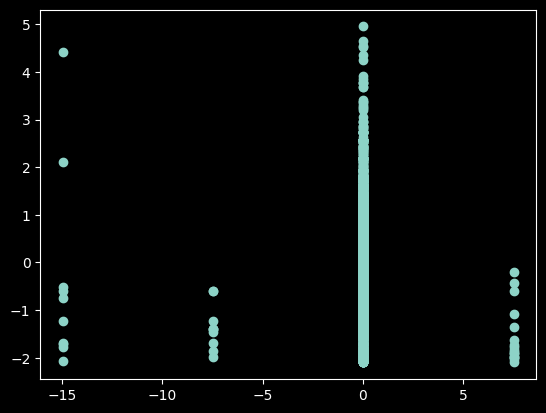

In [35]:
plt.scatter(df_scaled_std.employment_type, df_scaled_std.salary_in_usd)

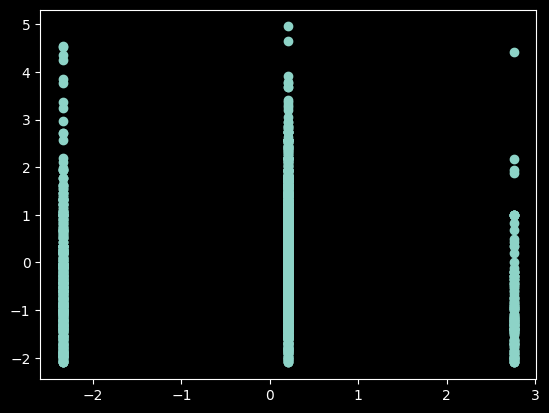

In [36]:
plt.scatter(df_scaled_std.company_size, df_scaled_std.salary_in_usd)

As shown the result is not good due to outliers, so a Robust Scaler will be used.

In [37]:
from sklearn import preprocessing
df_scaled_robust = preprocessing.RobustScaler().fit_transform(df)
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<Axes: ylabel='Frequency'>

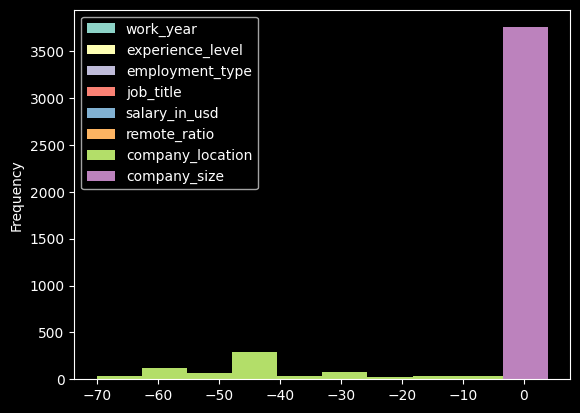

In [38]:
pd.DataFrame(df_scaled_robust, columns = df.columns).plot.hist()

kde plot after Robust Scaller

<Axes: ylabel='Density'>

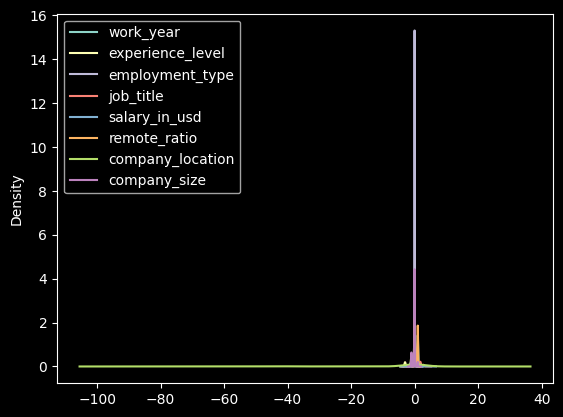

In [79]:
pd.DataFrame(df_scaled_robust, columns = df.columns).plot.kde()

<Axes: ylabel='Density'>

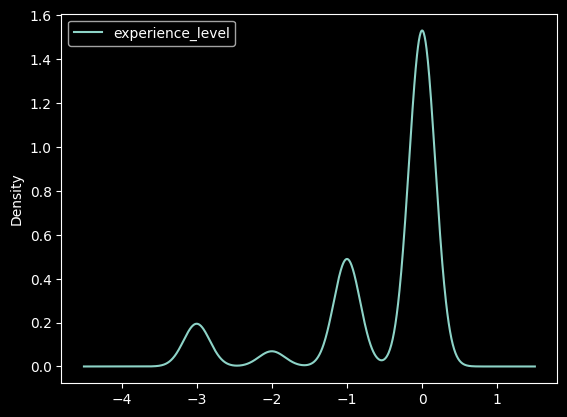

In [80]:
pd.DataFrame(df_scaled_robust, columns = df.columns).plot.kde(y='experience_level')

<Axes: ylabel='Density'>

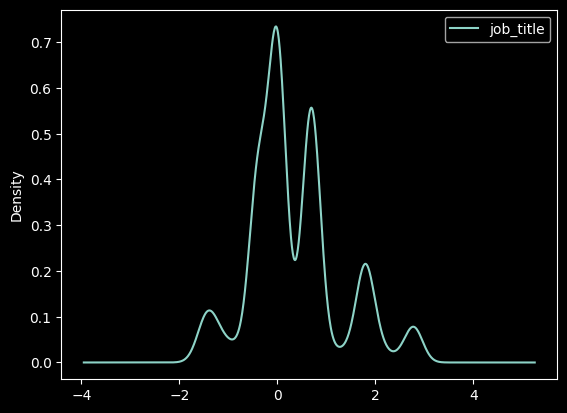

In [82]:
pd.DataFrame(df_scaled_robust, columns = df.columns).plot.kde(y='job_title')

<Axes: ylabel='Density'>

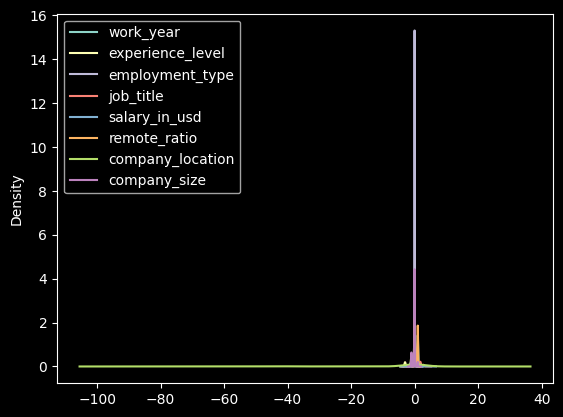

In [39]:
pd.DataFrame(df_scaled_robust, columns = df.columns).plot.kde()

## Feature Selection

In this section, feature selection will be performed on the transformed data in order to find the features that best correlate to the target variable to be predicted: `salary_in_usd`.

In [40]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,3,2,84,85847,100,25,0
1,2023,2,0,66,30000,100,70,2
2,2023,2,0,66,25500,100,70,2
3,2023,3,2,47,175000,100,12,1
4,2023,3,2,47,120000,100,12,1
5,2023,3,2,8,222200,0,70,0
6,2023,3,2,8,136000,0,70,0
7,2023,3,2,47,219000,0,12,1
8,2023,3,2,47,141000,0,12,1
9,2023,3,2,47,147100,0,70,1


Firstly, data will be split into `features` and `target`.

In [41]:
target = df['salary_in_usd']
features = df.drop('salary_in_usd', axis = 1)
target.head()

0     85847
1     30000
2     25500
3    175000
4    120000
Name: salary_in_usd, dtype: int64

In [42]:
features.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2023,3,2,84,100,25,0
1,2023,2,0,66,100,70,2
2,2023,2,0,66,100,70,2
3,2023,3,2,47,100,12,1
4,2023,3,2,47,100,12,1


### 1- Select Percentile

Now, features will be selected based on a percentile of features ranked by their scores. Scores will be determined using the `chi2` function.

In [43]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif

#The top 40% of features will be selected using chi2
FeatureSelection = SelectPercentile(score_func= chi2, percentile = 40) 

selected_features = FeatureSelection.fit_transform(features, target)

features.shape
print('Selected Features are \n',FeatureSelection.get_support())

Selected Features are 
 [False False False  True  True  True False]


As can be seen, the 20% most important features are `job_title`, `remote_ratio` and `company_location`.

### 3- Select K best

This selector, selects the `k` most important features. The `f_classif` function is used to determine scores.

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

#The top 3 features will be selected using f_classif
FeatureSelection = SelectKBest(f_classif ,k=3)
selected_features = FeatureSelection.fit_transform(features,target)

print(selected_features.shape)
print('Selected Features are \n',FeatureSelection.get_support())

(3755, 3)
Selected Features are 
 [ True False False False False  True  True]


As can be seen, the top 2 most important features are `work_year`, `company_location`, and `company_size`.


These selectors choose features based on a predetermined ratio or number of features selected by the data scientist. This technique is useful in big datasets containing a vast number of features, which justifies choosing features in this manner.

### 3- Select from model

This selector aims to reduce the arbitrariness of the previous ones, as it chooses a particular set faetures based on the specific learning model to be used. In this case, a Gradient Boost Regressor is assumed to be the model.

In [45]:
from sklearn.feature_selection import SelectFromModel, chi2
from sklearn.ensemble import GradientBoostingRegressor

#Features will be selected for a GradientBoostingRegressor
FeatureSelection =SelectFromModel(estimator = GradientBoostingRegressor())

selected_features = FeatureSelection.fit_transform(features, target)

print(FeatureSelection.get_support())

[False  True False  True False  True False]


This selector chose three features considered the most efficient if a gradient boost regressor is used. Namely they are: `experience_level`, `job_title`, and `company_location`.

## Regression - Salary Prediction

### Regressiong using Neural Networks

In this section, a neural network regression model is going to be trained and tested to predict the salaries of Data Scientists based on the other features.

In the following cell, data is split into train and test sets using `sklearn.train_test_split`.

In [46]:
#import train_test_split
from sklearn.model_selection import train_test_split

#seperating features and target
features = df.drop('salary_in_usd', axis=1)
target = df['salary_in_usd'].values

#split dataset into training and test features and targets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

Scaling the training and test sets in order to start training. The test sets are scaled using the paramaters gained from fitting the scaler to the training sets. This decreases bias in the testing of the model.

In [47]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#reshaping y_train & y_test to apply the scaling transformation
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In the following cells, the model is built and tested.

In [48]:
#importing required library to build a neural network model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

2023-05-07 18:06:52.891016: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 18:06:53.266303: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 18:06:53.268070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 18:06:54.321099: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [49]:
#Exploring X_train
print(X_train.shape)
df2 = pd.DataFrame(X_train)
df2.head()

(3004, 7)


,0,1,2,3,4,5,6
0,0.0,0.0,0.0,2.649351,1.0,-45.0,-1.0
1,0.0,-1.0,-2.0,1.714286,1.0,0.0,1.0
2,0.0,-1.0,-2.0,1.714286,1.0,0.0,1.0
3,0.0,0.0,0.0,0.727273,1.0,-58.0,0.0
4,0.0,0.0,0.0,0.727273,1.0,-58.0,0.0


In [50]:
#Exploring y_train
df3 = pd.DataFrame(y_test)
df3.head()

,0
0,0.391632
1,-0.065272
2,-0.541679
3,-0.863157
4,-0.300251


A `Sequential` model is built comprising four `Dense` (fully interconnected) layers. It uses the non-linear `RELU` activation function for the hidden layers, and a `linear` output layer. `L2 kernel regularization` is introduced in order to prevent overfitting and promote good generalization to test scenarios.

In [51]:
#constructing model
model = Sequential([
    tf.keras.Input(shape=(7,)),
    Dense(units = 25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(units = 10, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(units = 5, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(units = 1, activation = 'linear')
])

2023-05-07 18:06:55.719254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-07 18:06:55.720531: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model will use the `Adam`(adaptive moment estimation) optimization algorithm, and the `Mean Squared Error` loss function. It is initialized with a `Learning Rate` of 0.0001.

In [52]:
#compiling and summarizing model
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
model.compile(optimizer = Adam(learning_rate = 0.0001), loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


Now the model is ready to be fit to the data. It is run for a 200 `epochs`.

In [53]:
history = model.fit(X_train, y_train, validation_split= 0.2 ,epochs = 200)

Epoch 1/200
76/76 [==============================] - 1s 3ms/step - loss: 0.6167 - val_loss: 0.4775
Epoch 2/200
76/76 [==============================] - 0s 1ms/step - loss: 0.5823 - val_loss: 0.4686
Epoch 3/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5753 - val_loss: 0.4642
Epoch 4/200
76/76 [==============================] - 0s 1ms/step - loss: 0.5641 - val_loss: 0.4593
Epoch 5/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5594 - val_loss: 0.4584
Epoch 6/200
76/76 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.4573
Epoch 7/200
76/76 [==============================] - 0s 1ms/step - loss: 0.5533 - val_loss: 0.4570
Epoch 8/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5514 - val_loss: 0.4571
Epoch 9/200
76/76 [==============================] - 0s 1ms/step - loss: 0.5509 - val_loss: 0.4576
Epoch 10/200
76/76 [==============================] - 0s 2ms/step - loss: 0.5477 - val_loss: 0.4558
Epoch 11/

Training finished with loss of = 0.4468 on the training set. It can be said that the model has `low bias`, i.e. fits the training data well. However, the validation loss suggests little over fittin, for it has a 3% increase over the training loss. The model will be further tested for generalization and overfitting over the test set.

Forward propogation will be used to predict the target for the test set `y_hat`, which will be compared with the true target `y_test`

In [54]:
y_hat = model.predict(X_test)

24/24 [==============================] - 0s 843us/step


The `mean_squared_error` function is imported from `sklearn` to be applied between `y_hat` and `y_test`

In [55]:
#
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred = y_hat, y_true = y_test)

0.5058678688012804

As can be seen, test error is 0.5347, which compared to the training error of 0.4468 is a 19.6% increase in error. The model can be said to have high varianve, thus, further improvement is needed.

Real values of `y_hat` and `y_test` can be compared by applying the inverse transformation to the data.

In [56]:
y_hat_real = pd.DataFrame(scaler.inverse_transform(y_hat))
y_test_real = pd.DataFrame(scaler.inverse_transform(y_test))
pd.concat([y_hat_real, y_test_real], axis = 1)

,0,0
0,165504.359375,170000.0
1,165504.359375,135000.0
2,79370.164062,98506.0
3,79370.164062,73880.0
4,139936.609375,117000.0
...,...,...
746,153636.046875,412000.0
747,172726.281250,151000.0
748,111795.375000,105000.0
749,119334.343750,100000.0


It can be seen the model has high error margins. There are few things that can be improved. 
1. The model architecture can be changed, such as the number of hidden layers and/or neurons.
2. The hyperparametres can be adjusted, such the learning rate or regularization parametres.
3. More training epochs might be needed.
4. Further data collection and preperation might be needed.
5. Use a different machine learning algorithm such as XGBoost

### Regression using XGBoost

In this section, an XGBoost learning model will be built to further improve predictions. The `XGBRegressor` class from `xgboost` is used to build the model.

In [57]:
#xgboost library and the XGBRegressor class are imported
import xgboost as xgb
from xgboost import XGBRegressor

`XGBRegressor` is initialized with a squared error loss function for the regression task, and a `random_state` to produce repeatable results.

In [58]:
# define the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# train the model using X_train and y_train
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

The model is tested on the test set using `xgb_model.predict`, and evaluated using the `sklearn` function `mean_squared_error`.

In [59]:
# make predictions on the test set
y_pred = xgb_model.predict(X_test)

# evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.5016104277709611


In [60]:
y_pred_real = pd.DataFrame(scaler.inverse_transform(y_hat))
pd.concat([y_pred_real, y_test_real], axis = 1)

,0,0
0,165504.359375,170000.0
1,165504.359375,135000.0
2,79370.164062,98506.0
3,79370.164062,73880.0
4,139936.609375,117000.0
...,...,...
746,153636.046875,412000.0
747,172726.281250,151000.0
748,111795.375000,105000.0
749,119334.343750,100000.0


As can be seen, results are slightly better suggesting better generalization and less variance(overfitting).